#  Airlines Flight Data Analysis

In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read data 
airlines = pd.read_csv('airlines_flights_data.csv',index_col=0)
print(airlines.shape)
airlines.head() 

(300153, 11)


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


---

In [3]:
######################## question to answer ################################

# Q.1. What are the airlines in the dataset, accompanied by their frequencies?

# Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.

# Q.3. Show Bar Graphs representing the Source City & Destination City.

# Q.4. Does price varies with airlines ?

# Q.5. Does ticket price change based on the departure time and arrival time?

# Q.6. How the price changes with change in Source and Destination?

# Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?

# Q.8. How does the ticket price vary between Economy and Business class?

# Q.9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

---

#### Q. 1) What are the airlines in the dataset, accompanied by their frequencies?

In [4]:
airlines['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

---

#### Q. 2) Show Bar Graphs representing the Departure Time & Arrival Time.

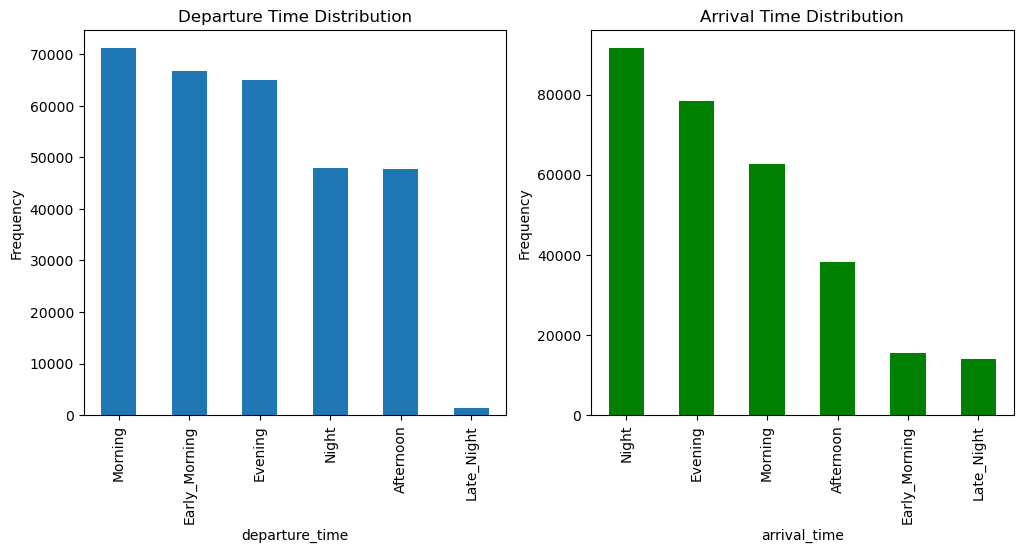

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
airlines['departure_time'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('departure_time')
plt.title('Departure Time Distribution')

plt.subplot(1, 2, 2)
airlines['arrival_time'].value_counts().plot(kind='bar', color='green')
plt.ylabel('Frequency')
plt.xlabel('arrival_time')
plt.title('Arrival Time Distribution')

plt.show()

---

#### Q. 3) Show Bar Graphs representing the Source City & Destination City.

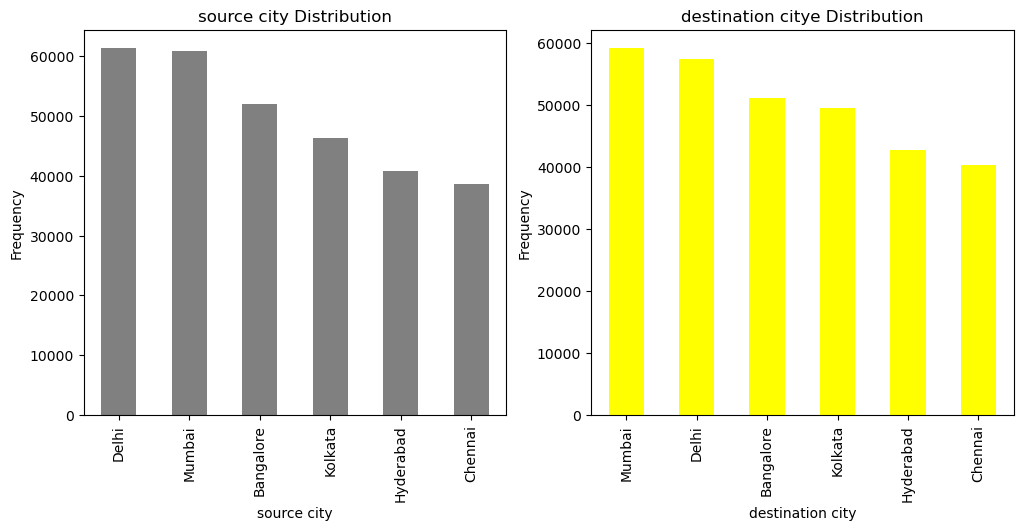

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
airlines['source_city'].value_counts().plot(kind='bar',color='gray')
plt.ylabel('Frequency')
plt.xlabel('source city')
plt.title('source city Distribution')

plt.subplot(1, 2, 2)
airlines['destination_city'].value_counts().plot(kind='bar', color='yellow')
plt.ylabel('Frequency')
plt.xlabel('destination city')
plt.title('destination citye Distribution')

plt.show()

---

#### Q.  4) Does price varies with airlines ?

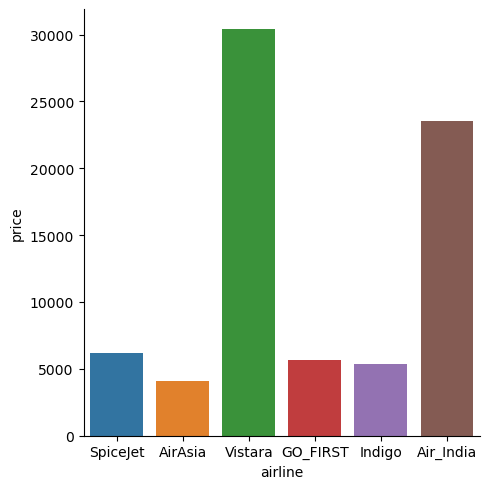

In [7]:
sns.catplot(data=airlines, x='airline', y='price', kind='bar',errorbar=None, hue='airline',legend=False)
plt.show()

---

#### Q. 5) Does ticket price change based on the departure time and arrival time?

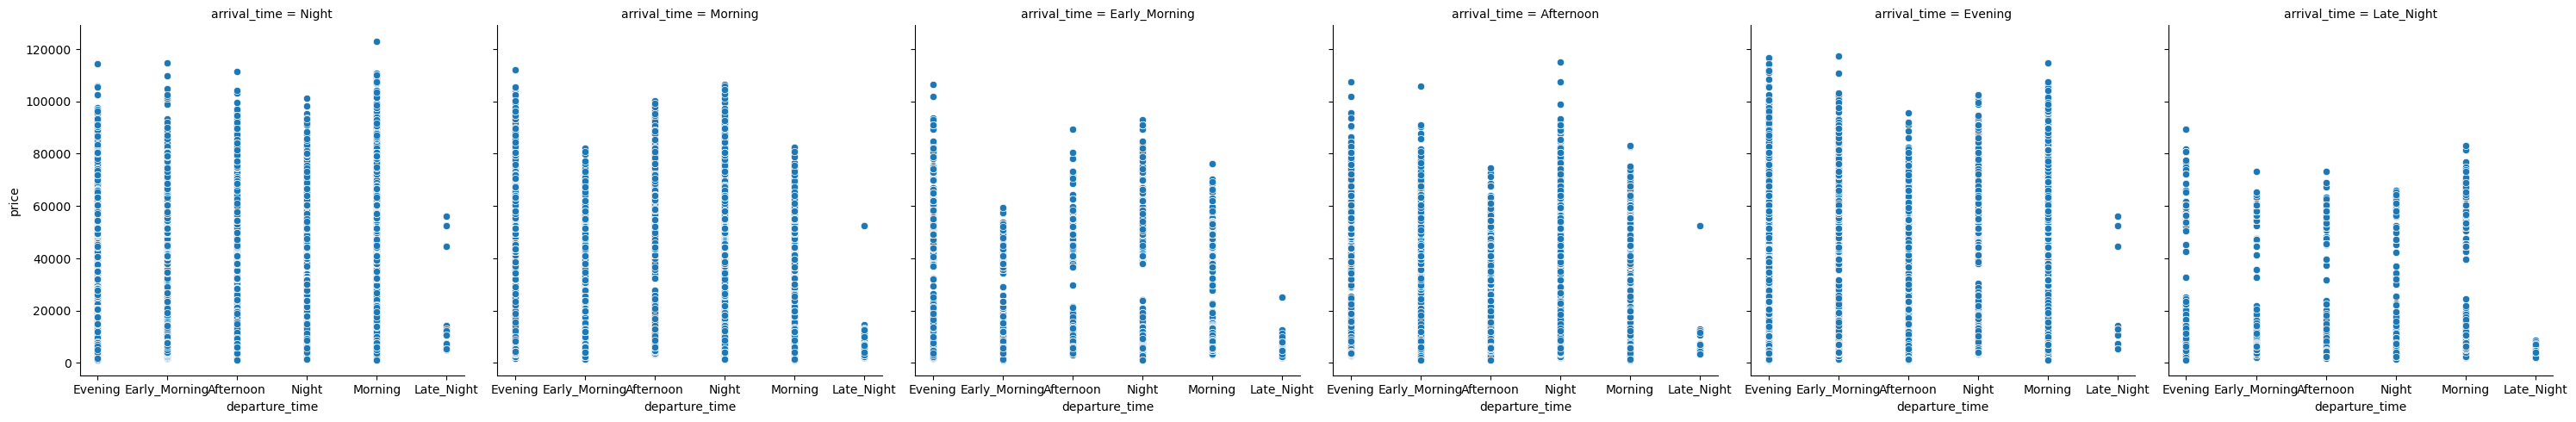

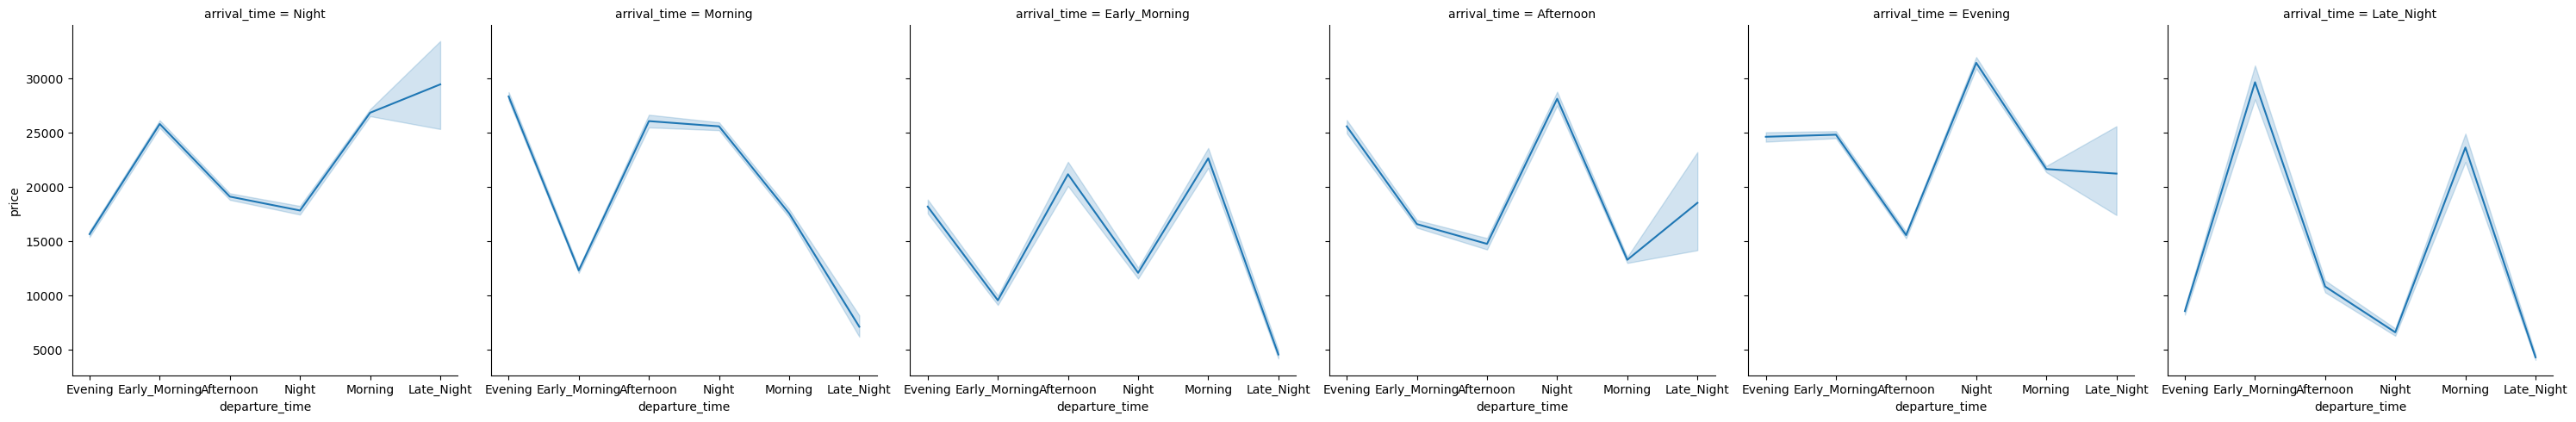

In [8]:
sns.relplot(data=airlines, x='departure_time', y='price', col='arrival_time')
sns.relplot(data=airlines, x='departure_time', y='price', col='arrival_time',kind='line')
plt.show()

---

#### Q. 6) How the price changes with change in Source and Destination?

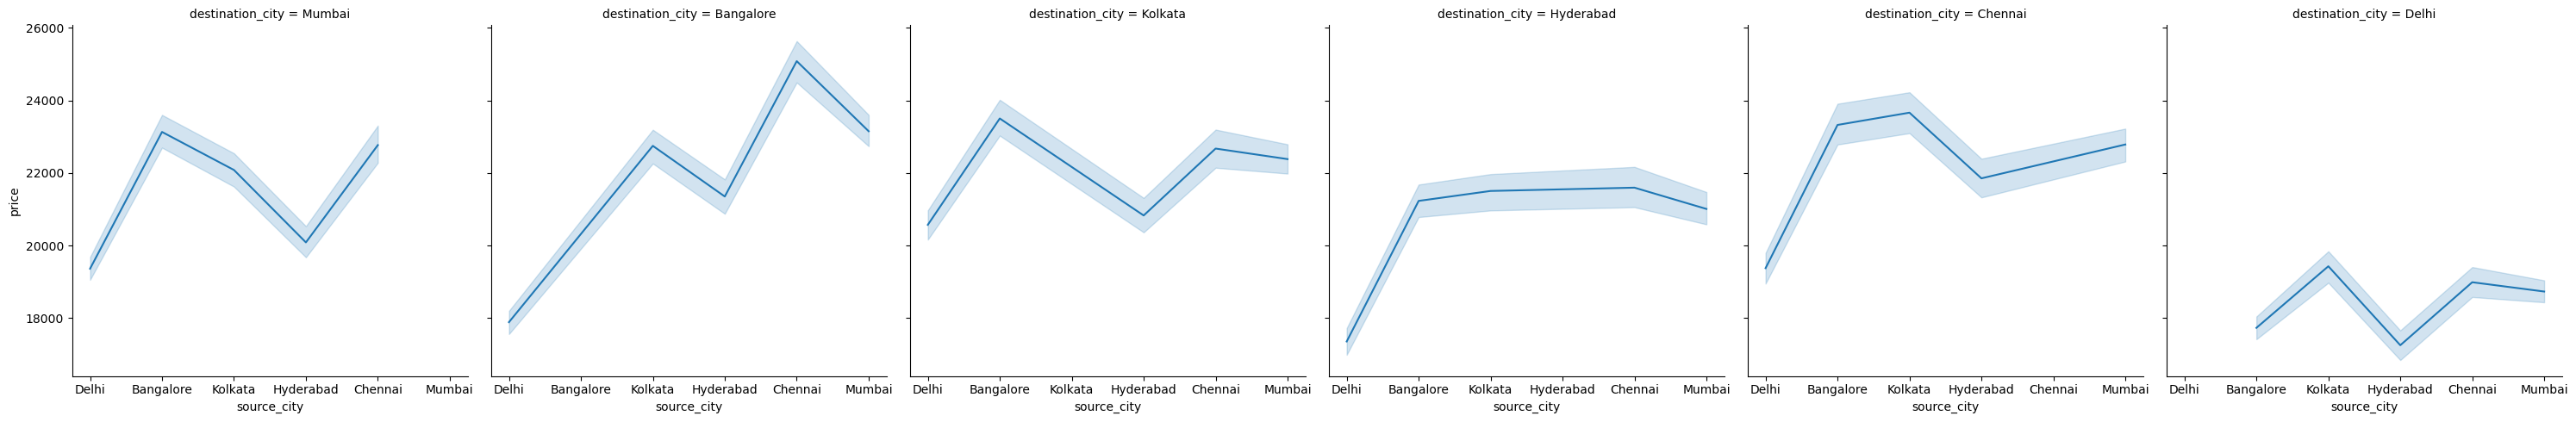

In [9]:
sns.relplot(data=airlines, x='source_city', y='price', col='destination_city',kind='line')
plt.show()

---

#### Q. 7) How is the price affected when tickets are bought in just 1 or 2 days before departure?

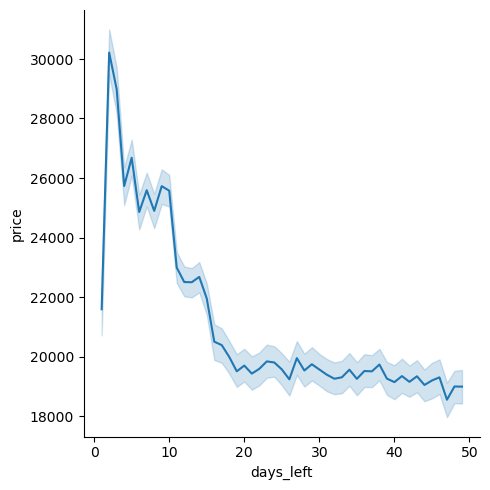

In [10]:
sns.relplot(data=airlines, x='days_left', y='price',kind='line')
plt.show()

---

#### Q.  8)  How does the ticket price vary between Economy and Business class?

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64


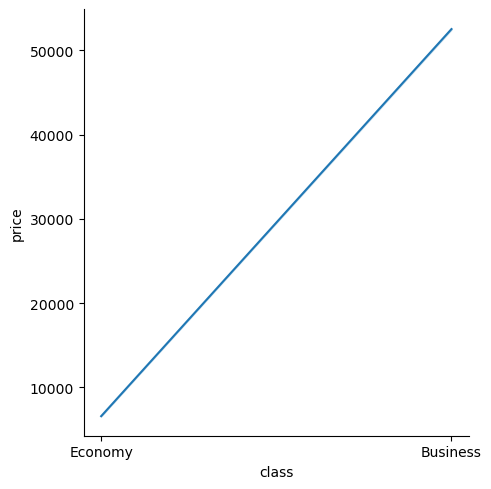

In [11]:
print(airlines.groupby('class')['price'].mean())
sns.relplot(data=airlines, x='class', y='price',kind='line')
plt.show()

---

#### Q.  9) What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

In [12]:
print(airlines[ (airlines['airline']=='Vistara') & (airlines['source_city']=='Delhi') & (airlines['destination_city']=='Hyderabad') 
& (airlines['class']=='Business') ]['price'].mean())

47939.840361445786


---